# Principal Component Analysis

This is an example of how principal component analysis can be used to reduce the dimensionality of a dataset.

In [1]:
from itertools import product

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

from mltools.preprocessing import PCA

## Load data

We use the [UCI ML handwritten digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits), imported from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).
This dataset contains 1797 8x8 samples of handwritten digits.
We will use the first 50 to test our PCA model's ability to recover data from principal components, and we will use the reamining samples to actually fit the PCA model.

In [2]:
x = load_digits().data
size = 50
x_train = x[size:, :]
x_test = x[:size, :]

## Plotting the original digits

First, we will plot the 50 test samples from the original dataset.

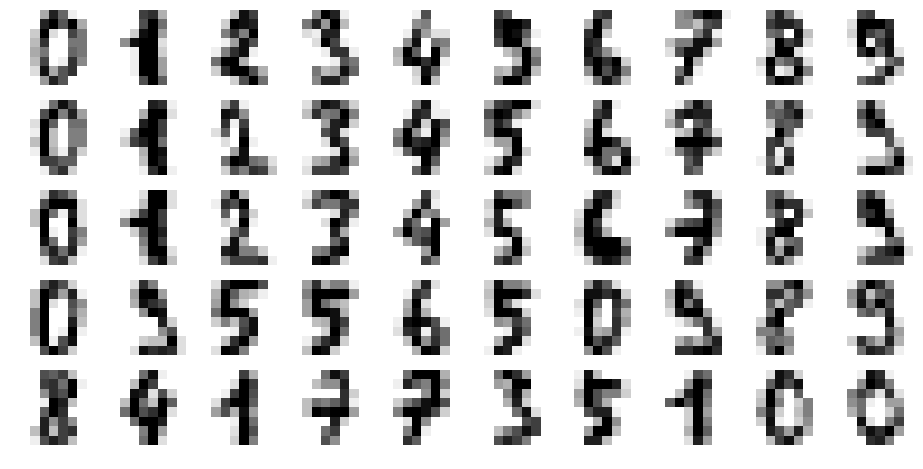

In [3]:
nrows = 5
ncols = 10

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 8))
for i, j in product(range(nrows), range(ncols)):
    digit = x_test[ncols * i + j, :].reshape((8, 8))
    axes[i, j].imshow(digit, cmap='binary')
    axes[i, j].axis('off')

plt.show()
plt.close()

## Dimensionality reduction using PCA

Next, we train a PCA model on the dataset (excluding the first 50 samples), and use it to reduce the first 50 samples to their first 30 principal components, thereby reducing their dimensionality by just over 50%.

In [4]:
pca = PCA()
pca.fit(x_train)
y = pca.transform(x_test, dim=30)

## Plotting the reconstructed digits

Next, we will attempt to reconstruct the first 50 samples from their principal components.
Some of the digits are reconstructed relatively well, while others become much less clear.

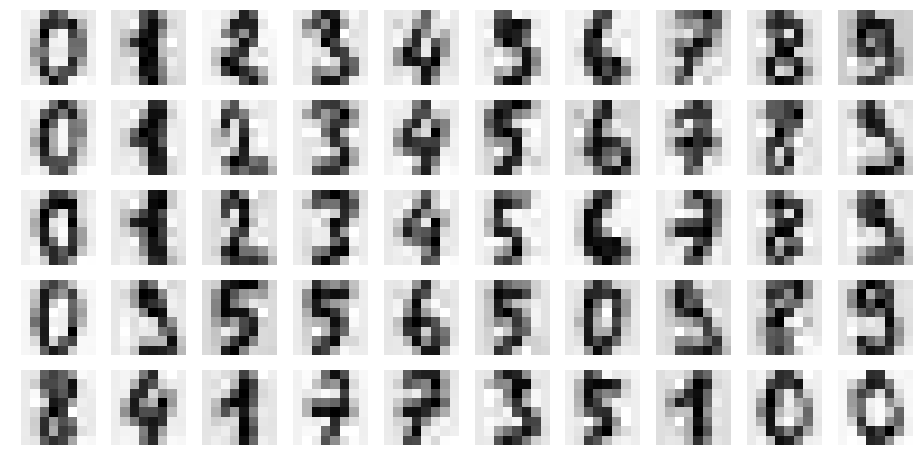

In [5]:
x_test_new = pca.inv_transform(y)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 8))
for i, j in product(range(nrows), range(ncols)):
    digit = x_test_new[ncols * i + j, :].reshape((8, 8))
    axes[i, j].imshow(digit, cmap='binary')
    axes[i, j].axis('off')

plt.show()
plt.close()